### Creating a Deep learning model to predict the different type of fashion accessories from 0 to 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### training data and testing data

In [3]:
(x_train1,y_train1),(x_test1,y_test1)=fashion_mnist.load_data()
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### data list

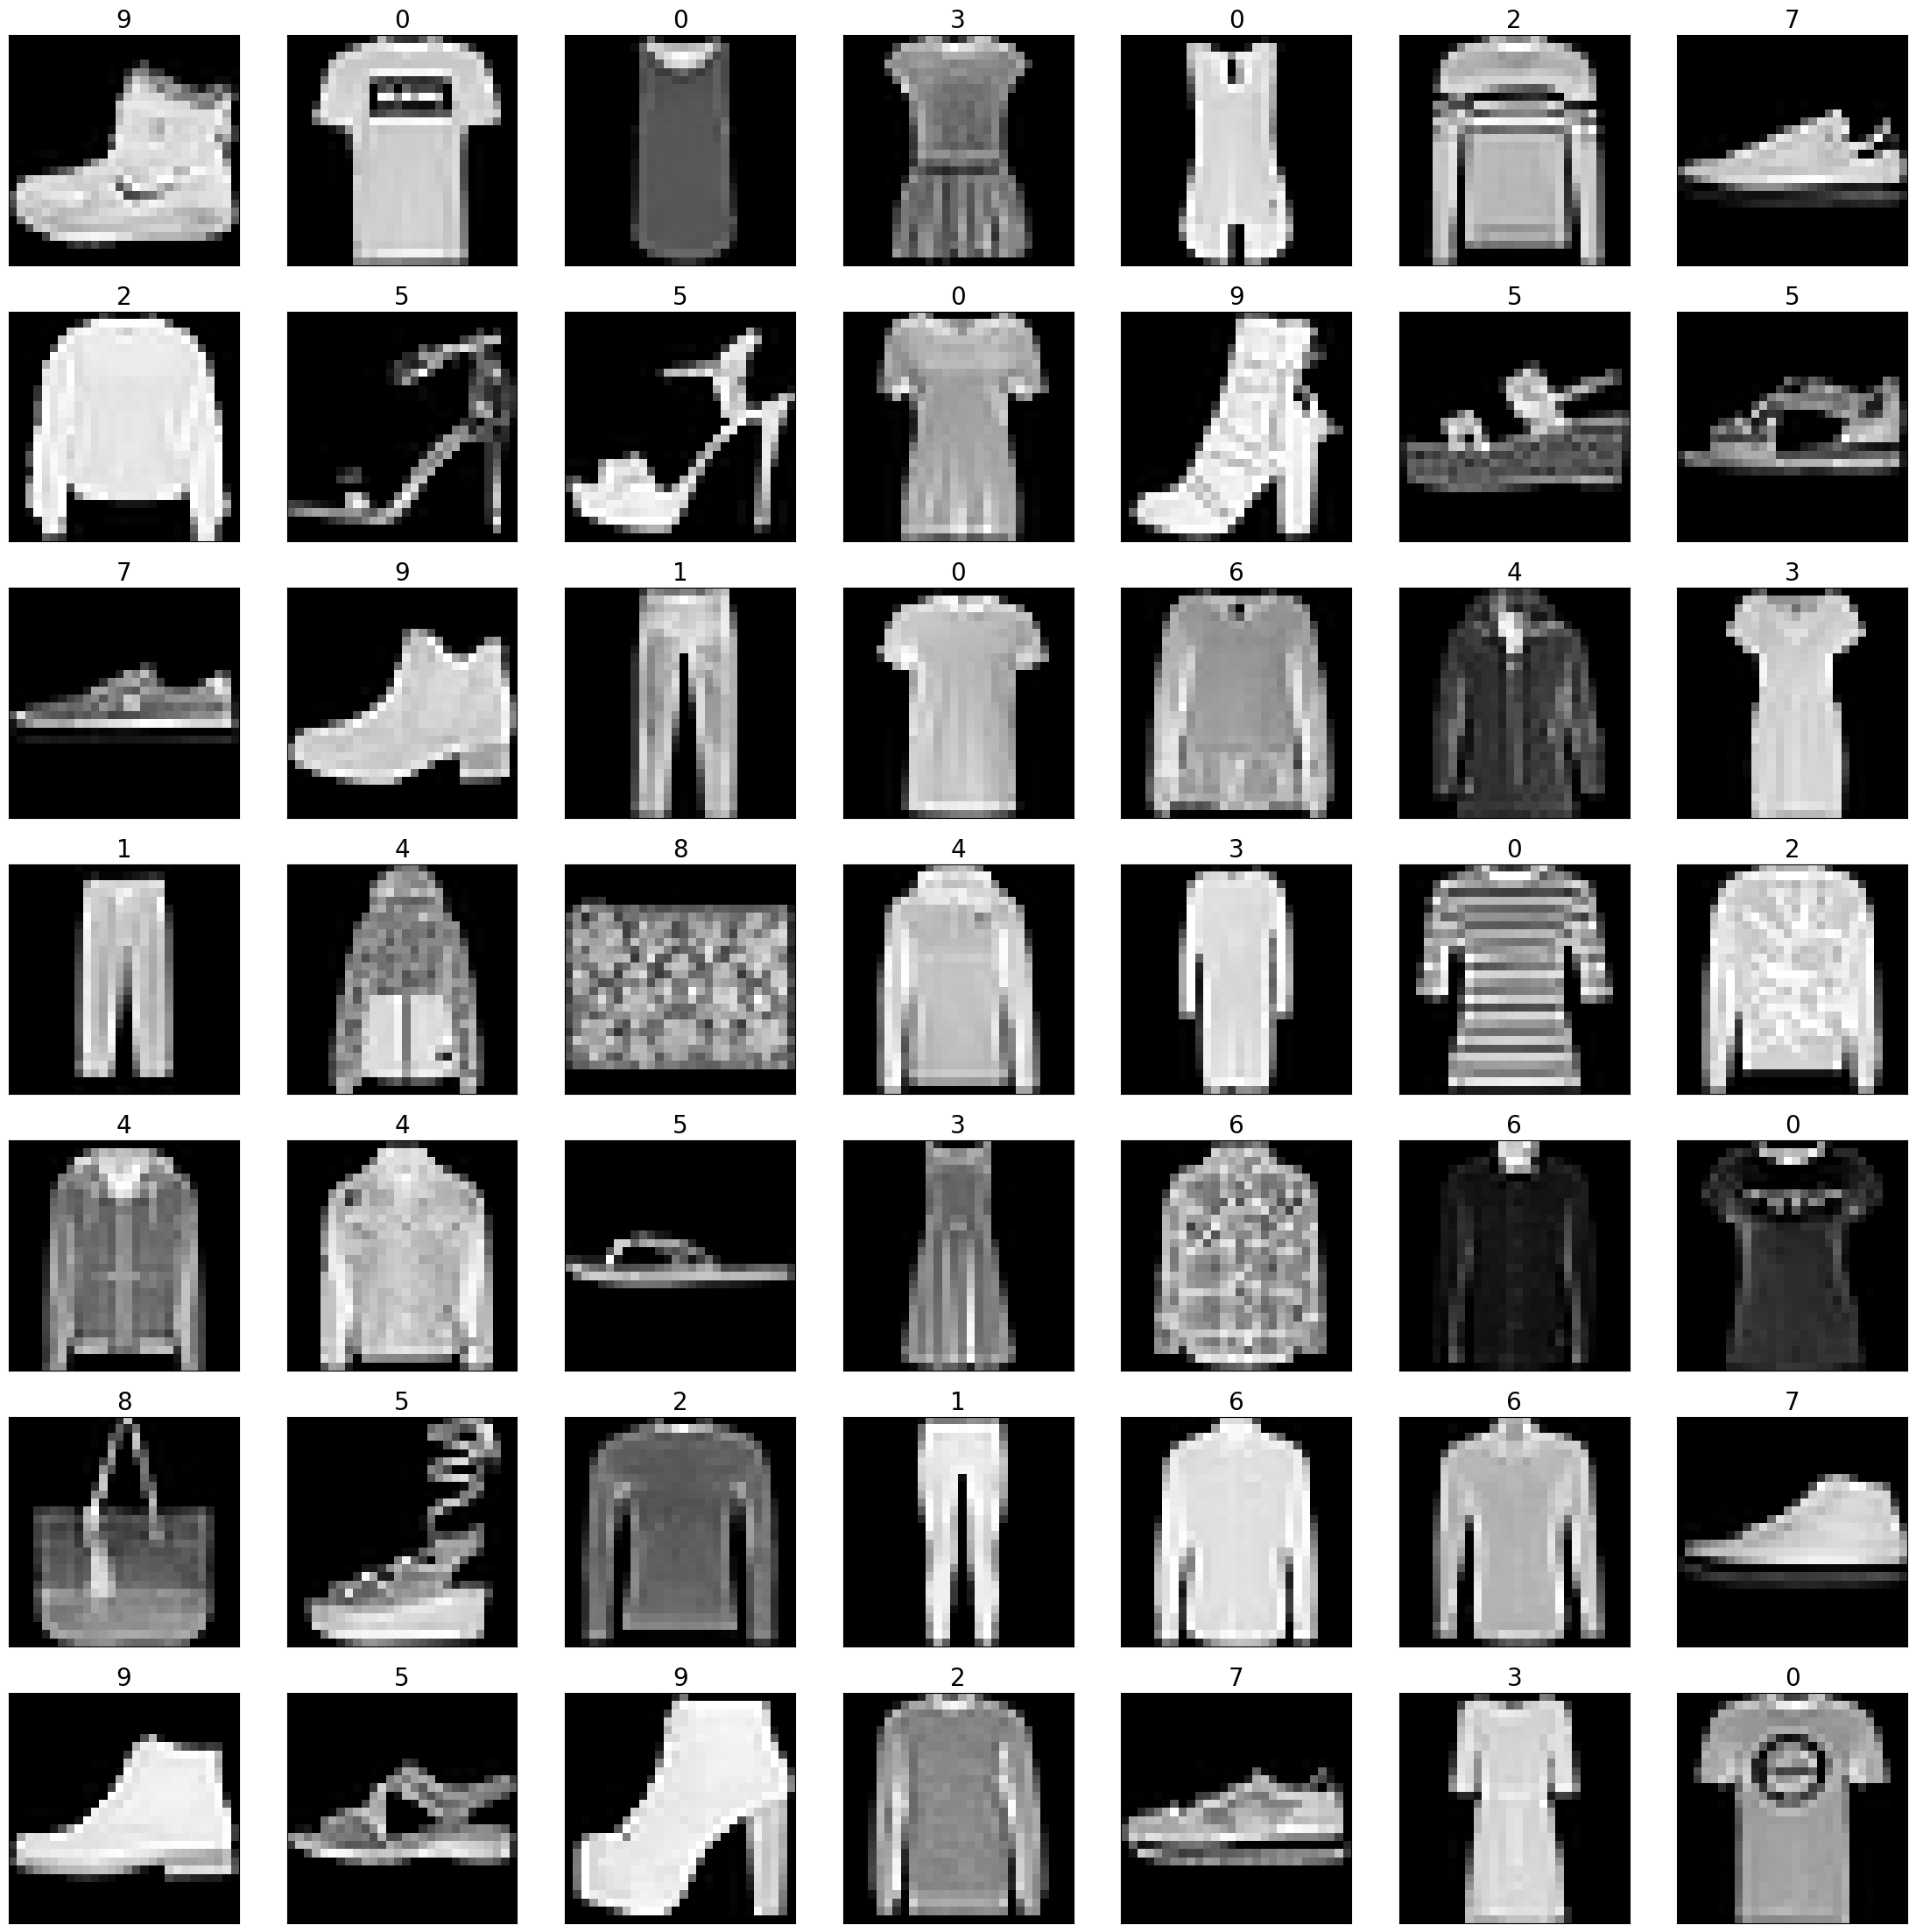

In [4]:
plt.figure(figsize=(28,28))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train1[i],'grey')
    plt.title(y_train1[i],fontsize=20)
plt.show()

In [5]:
x_train1 = x_train1[:10000,:,:]
y_train1= y_train1[:10000]
x_test1 = x_test1[:4000,:,:]
y_test1= y_test1[:4000]
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(10000, 28, 28)
(4000, 28, 28)
(10000,)
(4000,)


### Normalizing

In [6]:
x_train1=x_train1/255;
x_test1=x_test1/255;

In [7]:
x_train1=x_train1.reshape(10000,28,28,1)
x_test1=x_test1.reshape(4000,28,28,1)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(10000, 28, 28, 1)
(4000, 28, 28, 1)
(10000,)
(4000,)


### BUILDING AN CNN ARCHITECTURE

In [8]:
 from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [11]:
m1=Sequential()
m1.add(Conv2D(48,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Conv2D(96,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Flatten())
m1.add(Dense(96,activation='relu'))
m1.add(Dense(10,activation='softmax'))
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [12]:
m1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 48)          │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 96)          │          41,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │         230,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273,514 (1.04 MB)

 Trainable params: 273,514 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

### Executing the model for appropriate number of epochs

In [13]:
h1=m1.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=24)

Epoch 1/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.6493 - loss: 0.9862 - val_acc: 0.8175 - val_loss: 0.5087
Epoch 2/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.8348 - loss: 0.4495 - val_acc: 0.8468 - val_loss: 0.4329
Epoch 3/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.8636 - loss: 0.3695 - val_acc: 0.8210 - val_loss: 0.4843
Epoch 4/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.8741 - loss: 0.3387 - val_acc: 0.8568 - val_loss: 0.4068
Epoch 5/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.8909 - loss: 0.2925 - val_acc: 0.8560 - val_loss: 0.3958
Epoch 6/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.9019 - loss: 0.2668 - val_acc: 0.8715 - val_loss: 0.3929
Epoch 7/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9095 - loss: 0.2438 - val_acc: 0.8690 - val_loss: 0.3928
Epoch 8/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9237 - loss: 0.2040 - val_acc: 0.8525 - val_loss: 0.4191
Epoch 9/24
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 

In [14]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,acc,loss,val_acc,val_loss,Epochs
19,0.9875,0.036958,0.86850,0.685569,19
20,0.9895,0.030899,0.87050,0.686129,20
21,0.9928,0.023213,0.87725,0.666854,21
22,0.9894,0.032486,0.87025,0.642804,22
23,0.9909,0.030002,0.86975,0.700438,23


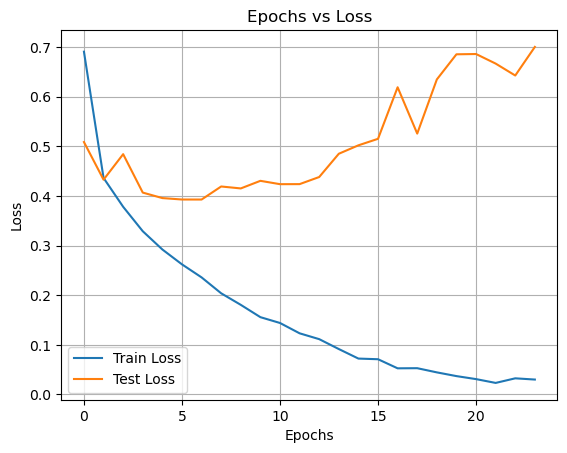

In [15]:
plt.plot(r1['Epochs'],r1['loss'],label='Train Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

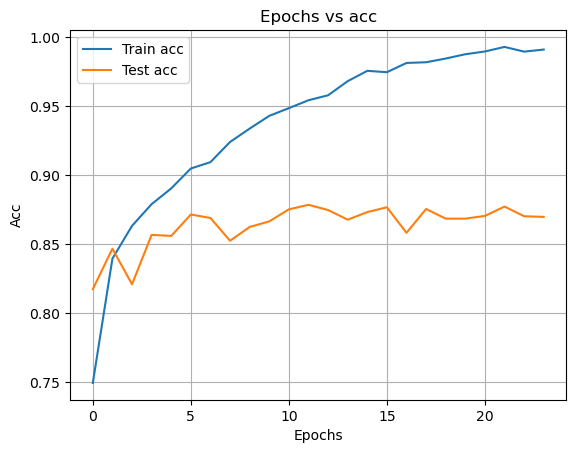

In [16]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.grid()
plt.legend()
plt.show()

### Generating the predictions on test_data

In [17]:
ypred=m1.predict(x_test1)
print(ypred[:3])

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[2.4210367e-18 1.8367014e-15 2.5918495e-11 8.6711573e-18 2.8469008e-14
  6.1319591e-12 2.7176313e-13 3.0274381e-09 2.3582455e-11 1.0000000e+00]
 [5.8684137e-16 4.8880216e-24 1.0000000e+00 6.6682917e-19 1.6877161e-08
  5.4845239e-24 1.0756788e-16 9.6073582e-27 4.1299716e-22 1.2090448e-23]
 [1.0229171e-17 1.0000000e+00 2.1954141e-20 3.4971918e-16 1.2315727e-19
  1.2963593e-15 3.0002799e-22 5.0236228e-22 3.7701275e-18 1.0817386e-26]]


In [18]:
ypred_m1=[np.argmax(i)for i in ypred]
print(ypred_m1[:10])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [19]:
from sklearn.metrics import confusion_matrix,classification_report

### Confusion Matrix

In [20]:
print(confusion_matrix(y_test1,ypred_m1))

[[314   1  13  11   3   3  56   0   5   0]
 [  1 385   0   8   1   0   0   0   0   0]
 [  5   0 340   3  38   0  27   0   0   0]
 [  5   2  11 338  22   0  17   0   1   0]
 [  0   0  31  13 351   1  18   0   0   0]
 [  0   0   0   0   0 378   0   4   0   2]
 [ 37   1  47   9  48   0 244   0   2   0]
 [  0   0   0   0   0  20   0 379   0  15]
 [  0   3   5   2   2   5  12   1 386   0]
 [  0   0   0   1   0   1   1   7   0 364]]


### Classsification report

In [21]:
print(classification_report(y_test1,ypred_m1))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       406
           1       0.98      0.97      0.98       395
           2       0.76      0.82      0.79       413
           3       0.88      0.85      0.87       396
           4       0.75      0.85      0.80       414
           5       0.93      0.98      0.95       384
           6       0.65      0.63      0.64       388
           7       0.97      0.92      0.94       414
           8       0.98      0.93      0.95       416
           9       0.96      0.97      0.96       374

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000

